In [53]:
import numpy as np
import pandas as pd
import random
import math
import matplotlib as mlt
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objects as go
from IPython.display import Image

import yfinance as yf
from urllib.parse import urlencode
from pandas_datareader import data as pdr
yf.pdr_override()


import math
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from keras.callbacks import EarlyStopping
from keras.metrics import *

In [21]:
## Reading forex paring raw data !

eur_jpy = pd.read_csv('data/eurjpy_2015_2020.csv', index_col=['date'], parse_dates=['date'])
eur_usd = pd.read_csv('data/eurusd_2015_2020.csv', index_col=['date'], parse_dates=['date'])
eur_gbp = pd.read_csv('data/eurgbp_2015_2020.csv', index_col=['date'], parse_dates=['date'])

gbp_jpy = pd.read_csv('data/gbpjpy_2015_2020.csv', index_col=['date'], parse_dates=['date'])
gbp_usd = pd.read_csv('data/gbpusd_2015_2020.csv', index_col=['date'], parse_dates=['date'])

## Reading S&P 500 and CBOE raw data !

SP500 = pd.read_csv('data/GSPC_2015_2020.csv')
VIX = pd.read_csv('data/VIX_2015_2020.csv')

In [20]:
# tickers = ['EURUSD=X', 'EURJPY=X', 'GBPJPY=X', 'EURGBP=X', 'GBPUSD=X']
# for df in [eur_jpy, eur_usd, eur_gbp, gbp_jpy, gbp_usd]:
    

In [19]:
# # Tickers
# tickers = ['^GSPC', '^VIX', '^TNX', 'EURUSD=X', 'EURJPY=X', 'GBPJPY=X', 'EURGBP=X', 'GBPUSD=X']

# # dates
# startdate = '2015-1-1'
# train_end = '2017-12-31'
# test_start = '2018-01-01'
# enddate = '2018-12-31'

# # data Close
# data_close = pdr.get_data_yahoo(tickers, start=startdate, end=enddate)
# print('\n--- Full dataset')
# display(data_close)

# # data returns
# data = data_close.shift(1) / data_close - 1
# print('\n--- Full dataset returns')
# display(data)

# # Sets
# data_train = data[startdate:train_end].dropna()
# data_test = data[test_staArt:enddate].dropna()
# print('\n--- Train set unadjusted')
# display(data_train)
# print('\n--- Test set unadjusted')
# display(data_test)

# # mu sigma train
# mu_train = data_train.mean()
# sigma_train = data_train.std()
# print('\n--- mu train:')
# display(pd.DataFrame(mu_train, columns=['Train set Mean']))
# print('\n--- sigma train:')
# display(pd.DataFrame(sigma_train, columns=['Train set st dev']))

# # Final sets
# data_train_prod = (data_train - mu_train) / sigma_train
# data_test_prod = (data_test - mu_train) / sigma_train
# print('\n--- Train set adjusted')
# display(data_train_prod)
# print('\n--- Test set adjusted')
# display(data_test_prod)

In [18]:
# for i in list(data_train_prod.columns):
#     plot(data_train_prod, column = i , type = str(i) + ' Train')
#     plot(data_test_prod, column = i , type = str(i) + ' Test')

In [14]:
# for df in [SP500, VIX]:
#     fig = go.Figure(data=go.Ohlc(x=df['Date'],
#                     open=df['Open'],
#                     high=df['High'],
#                     low=df['Low'],
#                     close=df['Close']))
#     fig.update(layout_xaxis_rangeslider_visible=False)
#     fig.show()

In [13]:
# for df in [eur_jpy, eur_usd, eur_gbp, gbp_jpy, gbp_usd]:
#     fig = go.Figure(data=go.Ohlc(x=df.index,
#                     open=df['open'],
#                     high=df['high'],
#                     low=df['low'],
#                     close=df['close']))

#     fig.show()

In [3]:
for df in [eur_jpy, eur_usd, eur_gbp, gbp_jpy, gbp_usd]:
    display(df.describe())
    display(df.info())

,open,high,low,close
count,1305.000000,1305.000000,1305.000000,1305.000000
mean,124.908663,125.393533,124.348818,124.895601
std,6.055382,6.043202,6.051071,6.041529
min,111.224000,111.861000,109.485000,111.100000
25%,120.512000,120.950000,120.020000,120.515000
50%,124.480000,124.899000,123.960000,124.478000
75%,130.090000,130.600000,129.530000,130.082000
max,138.438000,138.960000,136.640000,137.306000


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1305 entries, 2020-08-21 to 2015-08-24
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    1305 non-null   float64
 1   high    1305 non-null   float64
 2   low     1305 non-null   float64
 3   close   1305 non-null   float64
dtypes: float64(4)
memory usage: 51.0 KB


None

,open,high,low,close
count,1305.000000,1305.000000,1305.000000,1305.000000
mean,1.129712,1.133822,1.125595,1.129707
std,0.042975,0.043062,0.042911,0.042977
min,1.039000,1.041800,1.033900,1.039000
25%,1.101900,1.105700,1.098600,1.101800
50%,1.123400,1.127500,1.120000,1.123400
75%,1.155900,1.160800,1.151800,1.156400
max,1.250500,1.255600,1.244600,1.250500


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1305 entries, 2020-08-21 to 2015-08-24
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    1305 non-null   float64
 1   high    1305 non-null   float64
 2   low     1305 non-null   float64
 3   close   1305 non-null   float64
dtypes: float64(4)
memory usage: 51.0 KB


None

,open,high,low,close
count,1305.000000,1305.000000,1305.000000,1305.000000
mean,0.856453,0.860025,0.853026,0.856532
std,0.051080,0.050934,0.051144,0.050969
min,0.699600,0.702000,0.698000,0.699500
25%,0.848300,0.851400,0.845300,0.848000
50%,0.873600,0.876800,0.870700,0.873600
75%,0.889500,0.892600,0.886500,0.889700
max,0.938900,0.950000,0.924600,0.938900


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1305 entries, 2020-08-21 to 2015-08-24
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    1305 non-null   float64
 1   high    1305 non-null   float64
 2   low     1305 non-null   float64
 3   close   1305 non-null   float64
dtypes: float64(4)
memory usage: 51.0 KB


None

,open,high,low,close
count,1305.000000,1305.000000,1305.000000,1305.000000
mean,146.510717,147.257332,145.678839,146.474821
std,13.551101,13.571920,13.472552,13.490853
min,125.708000,126.996000,122.841000,125.707000
25%,138.390000,139.220000,137.520000,138.431000
50%,143.899000,144.610000,143.080000,143.945000
75%,149.424000,150.016000,148.810000,149.387000
max,190.592000,191.111000,187.563000,188.188000


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1305 entries, 2020-08-21 to 2015-08-24
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    1305 non-null   float64
 1   high    1305 non-null   float64
 2   low     1305 non-null   float64
 3   close   1305 non-null   float64
dtypes: float64(4)
memory usage: 51.0 KB


None

,open,high,low,close
count,1305.000000,1305.000000,1305.000000,1305.000000
mean,1.322941,1.328734,1.316954,1.322785
std,0.082801,0.082879,0.082563,0.082480
min,1.143300,1.171400,1.140800,1.143400
25%,1.266700,1.272500,1.261600,1.266700
50%,1.303200,1.308200,1.298100,1.303300
75%,1.349500,1.354400,1.342700,1.349400
max,1.575400,1.581800,1.567800,1.575400


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1305 entries, 2020-08-21 to 2015-08-24
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    1305 non-null   float64
 1   high    1305 non-null   float64
 2   low     1305 non-null   float64
 3   close   1305 non-null   float64
dtypes: float64(4)
memory usage: 51.0 KB


None

# Data Preparation

In [11]:
def plot(df, column = '' , type = ''):
    plt.figure(figsize=(16,4))
    _ = plt.title( type + " Daily Close returns")
    _ = plt.plot(df[column])
    _ = plt.axhline(y=np.mean(df[column]), color='red', linestyle='--')

## Filters out filtered sorted data frame !
def filter_data(dataframe , train_start_date, train_end_date, test_start_date, test_end_date):
    
    train = dataframe[(dataframe.index >= train_start_date) & (dataframe.index <= train_end_date)]
    train = train.sort_index()
    train = (train.diff(1)/train.shift(1)).dropna()
             
    mean_train = np.mean(train)
    std_train = np.std(train)       
    train  = (train - mean_train)/std_train
             
    test = dataframe[(dataframe.index >= test_start_date) & (dataframe.index <= test_end_date)]
    test = test.sort_index()
    test = (test.diff(1)/test.shift(1)).dropna()      
    test = (test-mean_train)/std_train
     
    print('Train')    
    display(train.head())
    plot(train, 'close', 'Train')
    print()
    
    print('Test')
    display(test.head())
    plot(test, 'close', 'Test')
    return(train, test)

In [10]:
# eur_jpy_train, eur_jpy_test = filter_data(eur_jpy, train_start_date='2016-01-01', train_end_date='2018-12-31', 
#                       test_start_date='2019-01-01', test_end_date='2019-12-31')

# LSTM Code

Train


,open,high,low,close
date,,,,
2016-01-04,0.016938,1.510008,-1.564187,-0.601269
2016-01-05,-0.755363,-2.028075,-1.474070,-1.530216
2016-01-06,-1.457262,-0.791914,0.079825,0.385695
2016-01-07,0.360131,2.610314,1.094376,2.812385
2016-01-08,2.752983,-0.227901,0.583796,-0.080749



Test


,open,high,low,close
date,,,,
2018-01-02,0.165054,1.039745,0.139316,0.706460
2018-01-03,0.692976,-0.294442,-0.060114,-0.858067
2018-01-04,-0.854414,0.361879,0.012356,1.020303
2018-01-05,1.034149,-0.159828,0.247813,-0.822453
2018-01-08,-0.734720,-0.563410,-1.217788,-1.051555


(260,)

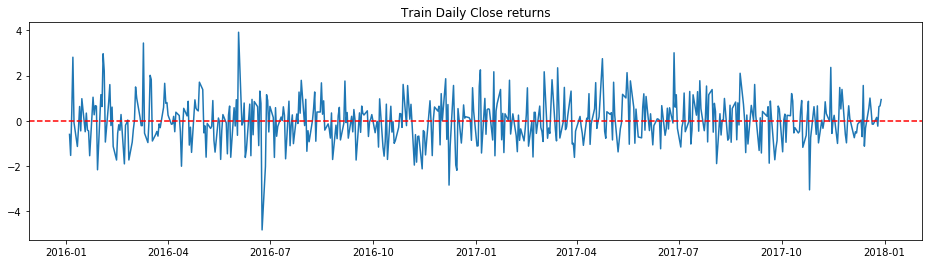

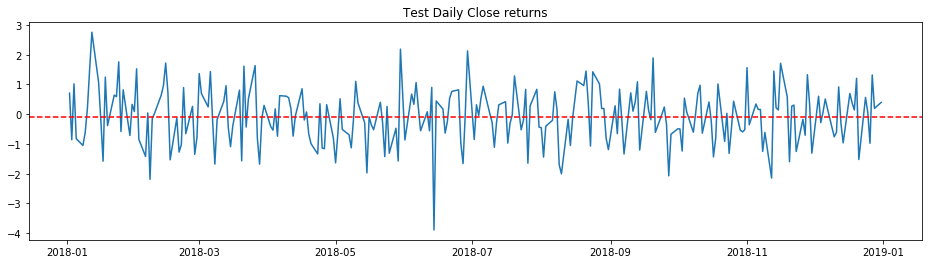

In [22]:
train, test = filter_data(dataframe= eur_usd, train_start_date='2016-01-01', train_end_date='2017-12-31', 
                      test_start_date='2018-01-01', test_end_date='2018-12-31')

train = np.array(train['close'])
test = np.array(test['close'])
np.shape(train)
np.shape(test)

In [79]:


train = np.reshape(train, (-1, 1))
test = np.reshape(test, (-1, 1))

def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)
    
look_back = 16  ## According to eric tu ## parameter
X_train, Y_train = create_dataset(train, look_back)
X_test, Y_test = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

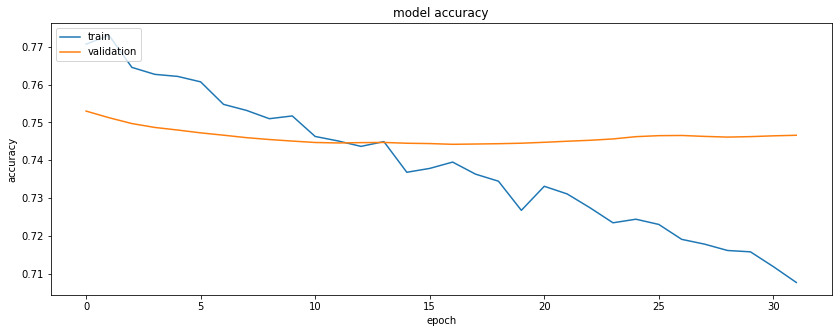

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_20 (LSTM)               (None, 25)                4200      
_________________________________________________________________
dropout_20 (Dropout)         (None, 25)                0         
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 26        
Total params: 4,226
Trainable params: 4,226
Non-trainable params: 0
_________________________________________________________________


In [81]:
model = Sequential()
model.add(LSTM(25, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.1))
model.add(Dense(1))
model.compile(loss='mean_absolute_error', optimizer='adam')

history = model.fit(X_train, Y_train, epochs=500, batch_size=90, validation_data=(X_test, Y_test), 
                    callbacks=[EarlyStopping(monitor='val_loss', patience=15)],
#                       callbacks=[plot_losses]
                    verbose=0, shuffle=False)

plt.figure(figsize=(14,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['train', 'validation'], loc='upper left')
plt.show()

model.summary()

In [117]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

print('Train Mean Absolute Error:', mean_absolute_error(Y_train, train_predict[:,0]))
print('Train Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_train, train_predict[:,0])))
print('Test Mean Absolute Error:', mean_absolute_error(Y_test, test_predict[:,0]))
print('Test Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_test, test_predict[:,0])))
print('MASE Train:', mean_absolute_error(Y_train, train_predict[:,0])/(np.abs(Y_train[1:]-Y_train[:-1]).sum()/(len(Y_train)-1)))
print('MASE Test:', mean_absolute_error(Y_test, test_predict[:,0])/(np.abs(Y_test[1:]-Y_test[:-1]).sum()/(len(Y_test)-1)))

Train Mean Absolute Error: tf.Tensor(0.7064802, shape=(), dtype=float32)
Train Root Mean Squared Error: 0.95808023
Test Mean Absolute Error: tf.Tensor(0.7465936, shape=(), dtype=float32)
Test Root Mean Squared Error: 0.9381875
MASE Train: tf.Tensor(0.62257147, shape=(), dtype=float32)
MASE Test: tf.Tensor(0.68991816, shape=(), dtype=float32)


In [293]:
def cal_mase(train,
             test,
             forecasted):
    mas = mean_absolute_error(forecasted, test)
    mas_naive = np.abs(train[1:] - train[:-1]).sum() / (len(train) - 1)
    return mas / mas_naive

In [270]:
def MASE(training_series, testing_series, prediction_series):
    print("Needs to be tested.")
    n = training_series.shape[0]
    d = np.abs(  np.diff( training_series) ).sum()/(n-1)
    
    errors = np.abs(testing_series - prediction_series )
    return errors.mean()/d

In [271]:
def get_df_name(df):
    name =[x for x in globals() if globals()[x] is df][0]
    return name